Silhouette Score: 0.21
KMeans Model Accuracy: 0.57
Adjusted Rand Index: 0.02


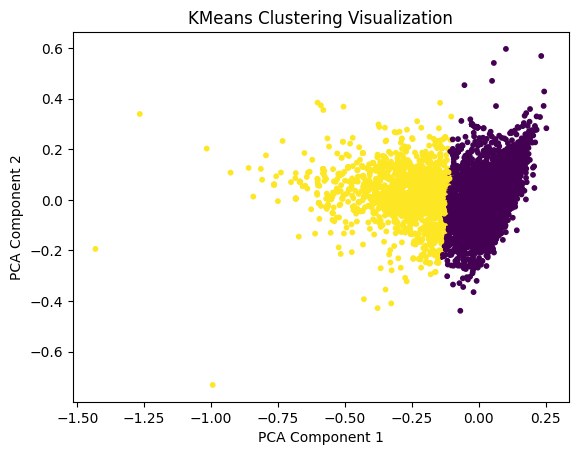

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score, adjusted_rand_score
from scipy.stats import mode
import numpy as np
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Veriyi yükleme
with open("fasttext_vectors.pkl", "rb") as file:
    X, y = pickle.load(file)

# NumPy dizisine dönüştürme
X = np.array(X)
y = np.array(y)

# KMeans modeli oluşturma
kmeans = KMeans(n_clusters=2, random_state=42)

# Modeli tüm veri üzerinde eğitme
kmeans.fit(X)

# Kümelerin atamalarını alın
y_pred = kmeans.labels_

# Silhouette skoru
silhouette = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette:.2f}")

# Kümeleri gerçek etiketlerle hizalama
aligned_labels = np.zeros_like(y_pred)
for i in range(2):
    mask = (y_pred == i)
    if np.any(mask):  # Eğer mask boş değilse hizalamayı yap
        # mode() fonksiyonundan dönen sonuca doğru erişim
        most_common = mode(y[mask], keepdims=True)  # keepdims, modun bir array olarak kalmasını sağlar
        aligned_labels[mask] = most_common.mode[0]

# Model performans metrikleri
accuracy = accuracy_score(y, aligned_labels)
ari_score = adjusted_rand_score(y, aligned_labels)
print(f"KMeans Model Accuracy: {accuracy:.2f}")
print(f"Adjusted Rand Index: {ari_score:.2f}")

# PCA ile 2D'ye indirme
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# KMeans kümeleri görselleştirme
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=aligned_labels, cmap="viridis", s=10)
plt.title("KMeans Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
#%57 doğruluk çok başarılı değil.